In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN

In [2]:
test = pd.read_csv("test_data_ex.csv")
train = pd.read_csv("training_data_ex.csv")
test

,f1,f2,label
0,0.278763,-0.439922,1
1,0.236923,-1.045364,0
2,-0.750667,-0.681287,0
3,1.035049,0.211380,0
4,0.894883,-0.373070,0
...,...,...,...
1995,-0.255742,0.975402,0
1996,0.265278,-0.328370,1
1997,-0.375094,-0.338054,1
1998,-0.301431,-0.422393,1


In [3]:
X_test = test[["f1", "f2"]]
y_test = test["label"].to_numpy()

X_train = train[["f1", "f2"]]
y_train = train["label"].to_numpy()
type(y_test)

numpy.ndarray

In [4]:
#model = LogisticRegression( fit_intercept=True)
#model.fit(X_train,y_train)

In [5]:
#y_pred = model.predict(X_test)
#print(accuracy_score(y_test,y_pred))

In [6]:
from sklearn.metrics import classification_report
#print(classification_report(y_test,y_pred))

In [7]:
from sklearn import svm
from sklearn.metrics import classification_report

model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
print(accuracy_score(y_test, y_pred_svm))

1.0


In [8]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



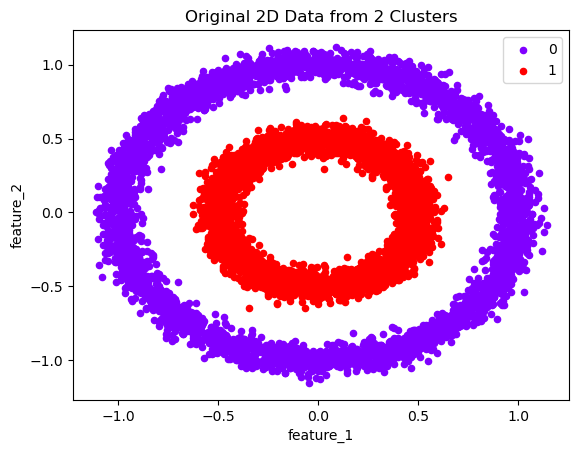

In [9]:
import matplotlib.cm as cm
df = pd.DataFrame(dict(feature_1=X_train['f1'], feature_2=X_train['f2'], label=y_train))


cluster_name = set(y_test)
colors = dict(zip(cluster_name, cm.rainbow(np.linspace(0, 1, len(cluster_name)))))
fig, ax = plt.subplots()

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='feature_1', y='feature_2', label=key, color=colors[key].reshape(1,-1))
    
plt.title('Original 2D Data from {} Clusters'.format(2))
plt.show()

C:\Users\tk_42\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


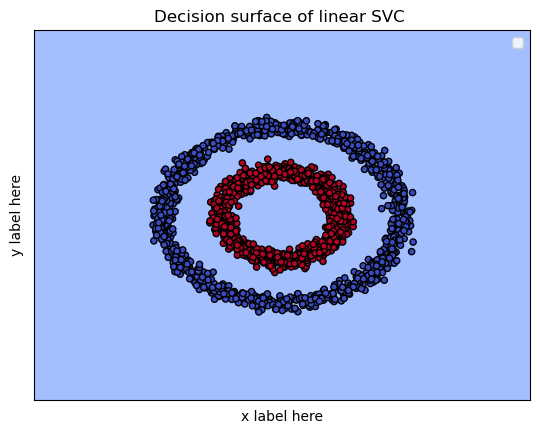

In [10]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X_test, y_test)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X_test_copy = X_test.values
#X_test_copy.columns = range(X_test_copy.columns.size)
#X_test_copy.rename(columns={"f1": 0, "f2": 1})
X0, X1 = X_test_copy[:, 0], X_test_copy[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [ ]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

df_copy = df_kmeans.copy()
df_copy['label'] = s_cluster_assignment

u_labels = np.unique(df_copy['label'])
n = len(u_labels)
cmap = get_cmap(n)


for i in u_labels:
    filtered = df_copy[df_copy['label'] == i]
    plt.scatter(filtered['x'], filtered['y'], color = cmap(i))

plt.xlabel('x-coordinates', fontsize=20)
plt.ylabel('y-coordinates', fontsize=20)
plt.title('Clusters of the df_kmeans Data', fontsize=20)